In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## T1 PvL

In [2]:
data_time1 = pd.read_csv('RF_time1.tsv',sep='\t', index_col = 0)
#data = data.T
data_time1

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436,Category,Week
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T1,1,3,1,10,1,0,1,1,0,15,...,19,126,0,0,0,5,0,1,Placebo,1
571.T1,2,0,257,50,0,2,0,22,0,4,...,67,7,0,1,0,2,4,1,Placebo,1
572.T1,0,1,31,6,1,1,0,1,0,60,...,1,4,1,0,0,0,0,0,Placebo,1
573.T1,0,2,100,14,1,2,1,3,0,3,...,0,3,108,0,0,1,0,8,Placebo,1
574.T1,0,6,0,15,0,0,15,267,1,1,...,0,4,17,1,0,1,25,1,Placebo,1
575.T1,1,4,21,1032,0,1,2,5,8,80,...,1,5,1,0,23,23,32,0,Placebo,1
576.T1,0,1,6,372,4,0,0,5,77,59,...,0,1,0,0,0,0,0,56,Placebo,1
577.T1,0,2,0,25,1,3,1,11,9,0,...,0,5,0,0,1,0,0,19,Placebo,1
578.T1,1,0,1,10,1,2,0,7,2,27,...,0,9,3,0,4,14,0,1,Letrozole,1


In [3]:
data_time1.iloc[:,0:58]

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Clostridiales_denovo47867,Lachnospiraceae_denovo48918,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T1,1,3,1,10,1,0,1,1,0,15,...,0,162,19,126,0,0,0,5,0,1
571.T1,2,0,257,50,0,2,0,22,0,4,...,3,48,67,7,0,1,0,2,4,1
572.T1,0,1,31,6,1,1,0,1,0,60,...,1,79,1,4,1,0,0,0,0,0
573.T1,0,2,100,14,1,2,1,3,0,3,...,1,3,0,3,108,0,0,1,0,8
574.T1,0,6,0,15,0,0,15,267,1,1,...,92,185,0,4,17,1,0,1,25,1
575.T1,1,4,21,1032,0,1,2,5,8,80,...,1,131,1,5,1,0,23,23,32,0
576.T1,0,1,6,372,4,0,0,5,77,59,...,1,118,0,1,0,0,0,0,0,56
577.T1,0,2,0,25,1,3,1,11,9,0,...,112,7,0,5,0,0,1,0,0,19
578.T1,1,0,1,10,1,2,0,7,2,27,...,0,0,0,9,3,0,4,14,0,1


In [4]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time1.iloc[:,58]
x = data_time1.iloc[:,0:58]

In [5]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

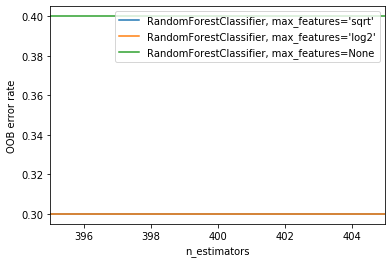

In [6]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 395
max_estimators = 405

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [7]:
clf = RandomForestClassifier(n_estimators=400, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [8]:
clf_final = RandomForestClassifier(n_estimators=400, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 1.0


In [9]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [10]:
print(clf_final.oob_score_)

0.7


In [11]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

32    0.091974
15    0.061599
23    0.058892
17    0.058207
28    0.057927
3     0.045729
55    0.044344
54    0.040764
57    0.035413
39    0.029442
46    0.025838
45    0.023561
2     0.022257
48    0.021290
7     0.020558
26    0.018596
42    0.017925
51    0.017380
43    0.016396
10    0.016302
dtype: float64

In [12]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
RF39_denovo222,0.091974
Lactobacillaceae_denovo146686,0.061599
S24-7_denovo191090,0.058892
Lactobacillaceae_denovo166520,0.058207
Erysipelotrichaceae_denovo212807,0.057927
Lachnospiraceae_denovo105779,0.045729
Clostridiales_denovo78281,0.044344
Ruminococcaceae_denovo7221,0.040764
Clostridiales_denovo96436,0.035413
Rikenellaceae_denovo265975,0.029442


In [13]:
imp.head(10).to_csv("RF_plot_time1.csv")

## T2 PvL

In [14]:
data_time2 = pd.read_csv('RF_time2.tsv',sep='\t', index_col = 0)
#data = data.T
data_time2

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436,Category,Week
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,28,9,3,1,0,0,3,0,55,...,19,33,0,0,0,30,1,0,Placebo,2
571.T2,8,0,55,28,0,0,1,17,0,12,...,18,36,0,0,0,1,2,0,Placebo,2
572.T2,2,2,2,60,0,0,0,0,0,26,...,32,5,2,0,0,2,5,0,Placebo,2
573.T2,0,0,0,19,2,0,1,1,1,168,...,0,4,19,0,0,26,0,0,Placebo,2
574.T2,1,17,0,14,0,0,5,50,3,11,...,1,1,2,1,1,0,2,0,Placebo,2
575.T2,0,0,48,4,1,0,1,5,3,57,...,0,3,1,14,0,0,6,0,Placebo,2
576.T2,0,3,2,144,2,1,0,4,6,2,...,0,2,0,0,0,1,0,6,Placebo,2
577.T2,0,2,0,33,0,1,0,6,5,0,...,3,1,0,0,0,2,0,14,Placebo,2
578.T2,1,0,3,19,6,1,2,0,0,1,...,0,284,1,0,30,19,1,1,Letrozole,2


In [15]:
data_time2.iloc[:,55]

OTU_ID
570.T2    30
571.T2     1
572.T2     2
573.T2    26
574.T2     0
575.T2     0
576.T2     1
577.T2     2
578.T2    19
580.T2     5
581.T2     1
582.T2    74
583.T2    26
584.T2    48
585.T2    19
586.T2    21
Name: Clostridiales_denovo78281, dtype: int64

In [16]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time2.iloc[:,58]
x = data_time2.iloc[:,0:58]

In [17]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

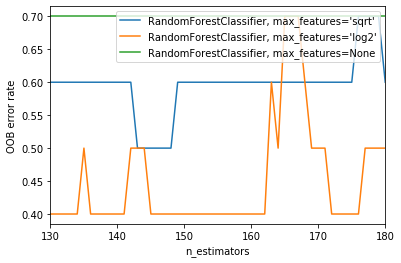

In [20]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 130
max_estimators = 180

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [18]:
clf = RandomForestClassifier(n_estimators=150, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.5


In [19]:
clf_final = RandomForestClassifier(n_estimators=150, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8333333333333334


In [20]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.888888888888889

In [21]:
print(clf_final.oob_score_)

0.6


In [22]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

22    0.078122
2     0.073189
36    0.049353
34    0.047198
49    0.036344
15    0.035922
40    0.035179
9     0.031753
29    0.031508
17    0.030524
55    0.029198
41    0.028044
30    0.026903
42    0.026634
26    0.026104
13    0.026019
27    0.022361
3     0.022254
51    0.021786
23    0.019220
dtype: float64

In [23]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Erysipelotrichaceae_denovo183158,0.078122
[Odoribacteraceae]_denovo105447,0.073189
Clostridiales_denovo25233,0.049353
Verrucomicrobiaceae_denovo235763,0.047198
Lachnospiraceae_denovo48918,0.036344
Lactobacillaceae_denovo146686,0.035922
Clostridiales_denovo272497,0.035179
Clostridiales_denovo122663,0.031753
Turicibacteraceae_denovo21549,0.031508
Lactobacillaceae_denovo166520,0.030524


In [24]:
imp.head(10).to_csv("RF_plot_time2.csv")

## T3 PvL

In [25]:
data_time3 = pd.read_csv('RF_time3.tsv',sep='\t', index_col = 0)
#data = data.T
data_time3

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436,Category,Week
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T3,0,77,3,9,1,2,2,5,1,59,...,23,202,1,0,1,81,0,1,Placebo,3
571.T3,4,0,72,60,0,0,1,550,1,7,...,36,37,0,0,0,1,3,1,Placebo,3
572.T3,0,2,6,6,0,0,0,1,0,25,...,13,0,0,0,0,0,28,1,Placebo,3
573.T3,0,5,41,31,0,0,2,5,2,27,...,83,5,0,0,1,23,2,1,Placebo,3
574.T3,9,55,23,9,2,0,6,37,0,19,...,18,2,1,0,1,1,1,0,Placebo,3
575.T3,0,115,15,7,0,2,33,9,0,21,...,1,470,33,3,0,42,5,1,Placebo,3
576.T3,0,0,1,573,0,0,0,3,0,3,...,0,1,0,0,0,1,0,32,Placebo,3
577.T3,0,3,3,62,0,0,0,1,1,1,...,0,1,0,0,0,0,15,0,Placebo,3
578.T3,0,2,41,102,1,1,41,43,3,10,...,0,603,1,0,38,127,0,2,Letrozole,3


In [26]:
data_time3.iloc[:,58]

OTU_ID
570.T3      Placebo
571.T3      Placebo
572.T3      Placebo
573.T3      Placebo
574.T3      Placebo
575.T3      Placebo
576.T3      Placebo
577.T3      Placebo
578.T3    Letrozole
580.T3    Letrozole
581.T3    Letrozole
582.T3    Letrozole
583.T3    Letrozole
584.T3    Letrozole
585.T3    Letrozole
586.T3    Letrozole
Name: Category, dtype: object

In [27]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time3.iloc[:,58]
x = data_time3.iloc[:,0:58]

In [28]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

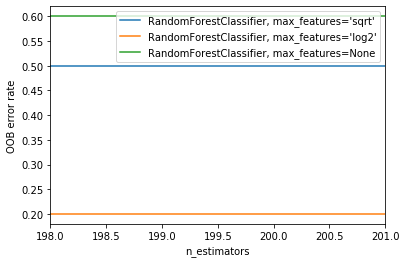

In [30]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 198
max_estimators = 201

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [31]:
clf = RandomForestClassifier(n_estimators=200, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.7


In [32]:
clf_final = RandomForestClassifier(n_estimators=200, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8333333333333334


In [33]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.888888888888889

In [34]:
print(clf_final.oob_score_)

0.8


In [35]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

17    0.074177
27    0.061111
4     0.047429
37    0.037262
5     0.036369
38    0.035595
51    0.030344
22    0.030179
31    0.029484
39    0.028810
9     0.027242
50    0.027063
15    0.026726
36    0.025764
34    0.025669
7     0.025605
57    0.024593
55    0.021368
32    0.019905
49    0.019629
dtype: float64

In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Lactobacillaceae_denovo166520,0.074177
Erysipelotrichaceae_denovo20841,0.061111
Clostridiales_denovo106781,0.047429
Clostridiales_denovo255839,0.037262
Lachnospiraceae_denovo107847,0.036369
Lachnospiraceae_denovo261738,0.035595
Clostridiales_denovo63866,0.030344
Erysipelotrichaceae_denovo183158,0.030179
Lachnospiraceae_denovo219613,0.029484
Rikenellaceae_denovo265975,0.028810


In [37]:
imp.head(10).to_csv("RF_plot_time3.csv")

## T4 PvL

In [38]:
data_time4 = pd.read_csv('RF_time4.tsv',sep='\t', index_col = 0)
#data = data.T
data_time4

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436,Category,Week
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T4,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,Placebo,4
571.T4,1,0,102,302,3,2,40,406,0,13,...,20,48,0,0,0,3,0,0,Placebo,4
572.T4,0,2,331,97,0,1,0,2,3,3,...,79,1,0,0,1,0,6,3,Placebo,4
573.T4,16,5,66,10,1,0,0,1,4,81,...,73,0,0,0,0,0,23,0,Placebo,4
574.T4,42,102,125,50,0,1,96,138,1,14,...,99,13,10,0,0,0,2,0,Placebo,4
575.T4,16,120,4,5,1,1,45,2,0,30,...,37,158,1,0,1,1,2,0,Placebo,4
576.T4,1,1,0,294,0,0,0,0,3,3,...,0,2,0,0,1,2,3,7,Placebo,4
577.T4,0,1,4,1801,1,3,1,1,2,0,...,0,0,0,0,0,2,55,2,Placebo,4
578.T4,8,0,1,56,1,1,132,8,0,6,...,0,779,2,6,101,98,3,1,Letrozole,4


In [39]:
data_time4.iloc[:,0:57]

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Clostridiales_denovo37041,Clostridiales_denovo47867,Lachnospiraceae_denovo48918,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0
571.T4,1,0,102,302,3,2,40,406,0,13,...,0,1,3,20,48,0,0,0,3,0
572.T4,0,2,331,97,0,1,0,2,3,3,...,0,1,134,79,1,0,0,1,0,6
573.T4,16,5,66,10,1,0,0,1,4,81,...,2,1,199,73,0,0,0,0,0,23
574.T4,42,102,125,50,0,1,96,138,1,14,...,2,1,3,99,13,10,0,0,0,2
575.T4,16,120,4,5,1,1,45,2,0,30,...,1,2,3,37,158,1,0,1,1,2
576.T4,1,1,0,294,0,0,0,0,3,3,...,1,5,192,0,2,0,0,1,2,3
577.T4,0,1,4,1801,1,3,1,1,2,0,...,3,0,6,0,0,0,0,0,2,55
578.T4,8,0,1,56,1,1,132,8,0,6,...,0,1,126,0,779,2,6,101,98,3


In [40]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time4.iloc[:,58]
x = data_time4.iloc[:,0:58]

In [41]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

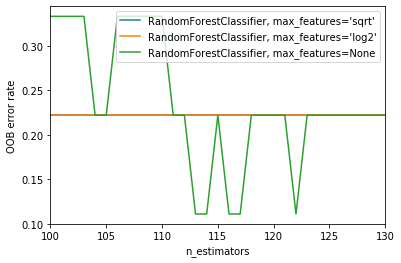

In [44]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 130

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [42]:
clf = RandomForestClassifier(n_estimators=117, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean Validation Scores: 0.8


In [43]:
clf_final = RandomForestClassifier(n_estimators=117, bootstrap=True,max_features=None,oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8333333333333334


In [44]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [45]:
print(clf_final.oob_score_)

0.8888888888888888


In [46]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

15    0.153846
17    0.153846
4     0.094017
27    0.059829
16    0.051282
25    0.042735
37    0.042735
45    0.034188
9     0.034188
31    0.025641
3     0.025641
46    0.025641
29    0.025641
51    0.017094
7     0.017094
33    0.017094
11    0.017094
22    0.017094
2     0.017094
55    0.017094
dtype: float64

In [47]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Lactobacillaceae_denovo166520,0.153846
Lactobacillaceae_denovo146686,0.153846
Clostridiales_denovo106781,0.094017
Erysipelotrichaceae_denovo20841,0.059829
Ruminococcaceae_denovo158036,0.051282
Clostridiales_denovo195879,0.042735
Clostridiales_denovo255839,0.042735
Clostridiales_denovo122663,0.034188
Lachnospiraceae_denovo304282,0.034188
Lachnospiraceae_denovo105779,0.025641


In [48]:
imp.head(10).to_csv("RF_plot_time4.csv")

## T5 PvL

In [49]:
data_time5 = pd.read_csv('RF_time5.tsv',sep='\t', index_col = 0)
#data = data.T
data_time5

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378,Clostridiales_denovo96436,Category,Week
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T5,0,24,14,21,0,0,1,3,1,129,...,39,283,0,0,1,27,4,2,Placebo,5
571.T5,48,1,23,597,0,1,105,231,6,98,...,34,28,0,0,1,1,1,3,Placebo,5
572.T5,16,1,193,143,2,1,0,9,0,1,...,1,5,1,0,0,4,36,2,Placebo,5
573.T5,0,2,2,4,0,1,0,3,0,4,...,36,1,0,0,0,1,4,0,Placebo,5
574.T5,48,195,37,57,0,1,98,53,1,18,...,93,49,2,0,0,4,1,1,Placebo,5
575.T5,9,215,3,6,0,1,127,3,2,22,...,47,156,0,0,0,0,5,0,Placebo,5
576.T5,0,2,0,365,49,1,1,2,4,1,...,0,0,0,0,0,0,9,1,Placebo,5
577.T5,0,2,3,3566,92,1,0,1,0,3,...,1,3,1,0,1,1,52,1,Placebo,5
578.T5,6,1,2,7,0,105,23,14,0,3,...,0,381,1,0,196,24,0,0,Letrozole,5


In [50]:
data_time5.iloc[:,0:57]

,Lachnospiraceae_denovo103326,Ruminococcaceae_denovo104808,[Odoribacteraceae]_denovo105447,Lachnospiraceae_denovo105779,Clostridiales_denovo106781,Lachnospiraceae_denovo107847,Lachnospiraceae_denovo107864,Lachnospiraceae_denovo114016,Bacteroidales_denovo116759,Clostridiales_denovo122663,...,Clostridiales_denovo37041,Clostridiales_denovo47867,Lachnospiraceae_denovo48918,Lachnospiraceae_denovo56632,Clostridiales_denovo63866,Clostridiales_denovo65277,Clostridiales_denovo71608,Ruminococcaceae_denovo7221,Clostridiales_denovo78281,Ruminococcaceae_denovo94378
OTU_ID,,,,,,,,,,,,,,,,,,,,,
570.T5,0,24,14,21,0,0,1,3,1,129,...,0,0,171,39,283,0,0,1,27,4
571.T5,48,1,23,597,0,1,105,231,6,98,...,1,3,1,34,28,0,0,1,1,1
572.T5,16,1,193,143,2,1,0,9,0,1,...,3,3,40,1,5,1,0,0,4,36
573.T5,0,2,2,4,0,1,0,3,0,4,...,1,0,109,36,1,0,0,0,1,4
574.T5,48,195,37,57,0,1,98,53,1,18,...,0,6,4,93,49,2,0,0,4,1
575.T5,9,215,3,6,0,1,127,3,2,22,...,1,1,3,47,156,0,0,0,0,5
576.T5,0,2,0,365,49,1,1,2,4,1,...,1,1,75,0,0,0,0,0,0,9
577.T5,0,2,3,3566,92,1,0,1,0,3,...,0,1,95,1,3,1,0,1,1,52
578.T5,6,1,2,7,0,105,23,14,0,3,...,3,0,27,0,381,1,0,196,24,0


In [51]:
# Split the Groups from the dataset where y is category and x is data with species
y = data_time5.iloc[:,58]
x = data_time5.iloc[:,0:58]

In [52]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

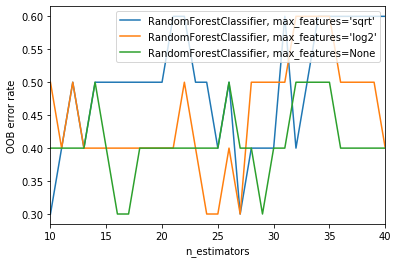

In [56]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 40

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [53]:
clf = RandomForestClassifier(n_estimators=25, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.6


In [54]:
clf_final = RandomForestClassifier(n_estimators=30, bootstrap=True,max_features='log2',oob_score= True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [55]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6111111111111112

In [56]:
print(clf_final.oob_score_)

0.5


In [57]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

30    0.101587
34    0.091667
9     0.081481
1     0.065079
33    0.056944
44    0.055556
56    0.051481
38    0.047090
14    0.040278
52    0.036310
39    0.033333
54    0.033333
37    0.033333
12    0.033333
4     0.033333
31    0.030000
42    0.023810
47    0.022454
21    0.021429
10    0.020833
dtype: float64

In [58]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data_time1.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Lachnospiraceae_denovo217363,0.101587
Verrucomicrobiaceae_denovo235763,0.091667
Clostridiales_denovo122663,0.081481
Ruminococcaceae_denovo104808,0.065079
Clostridiales_denovo230276,0.056944
Lachnospiraceae_denovo296598,0.055556
Ruminococcaceae_denovo94378,0.051481
Lachnospiraceae_denovo261738,0.047090
Clostridiales_denovo146209,0.040278
Clostridiales_denovo65277,0.036310


In [59]:
imp.head(10).to_csv("RF_plot_time5.csv")